In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib 
pd.options.display.max_columns = None

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
#Use the requests package to make a GET request from the API endpoint:
r = requests.get(url)
#Then, transform that request into a json object:
json = r.json()
#Let’s look at the json keys, and then we’ll create our dataframe(s)
json.keys()

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
#Preview the top 5 rows of your dataframes with the head() method. Like so:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,80201,0,0,0,0,0,1,3.5,None,0,Bernd,0.0,1,False,,None,50,80201.jpg,3.7,Leno,2.3,False,None,a,1,3,131,0,0,0,0,0.0,26.2,Leno,3131,0,0,11,37,1,1,0,0,1,86,11,625,702.2,0.0,2.0,70.3,42,12,436,47,327,4,198,13,NaN,,NaN,,NaN,
1,NaN,None,115918,0,0,0,0,0,1,2.0,None,0,Rúnar Alex,0.0,2,False,,None,40,115918.jpg,1.0,Rúnarsson,1.2,False,None,a,1,3,1,0,0,0,0,0.0,0.2,Rúnarsson,15,0,0,0,0,0,0,0,0,0,2,0,8,16.6,0.0,0.0,1.7,351,31,347,17,340,13,357,32,NaN,,NaN,,NaN,
2,NaN,None,47431,0,0,0,0,0,3,3.2,None,0,Willian,0.0,3,False,,None,65,47431.jpg,3.1,Borges Da Silva,0.3,False,None,a,1,3,78,0,0,0,0,0.0,12.0,Willian,1398,1,7,3,17,0,0,0,0,0,0,9,306,256.2,534.8,228.0,102.3,224,96,49,36,146,85,124,71,1.0,,2.0,,NaN,
3,NaN,None,54694,0,0,0,0,0,4,4.2,None,0,Pierre-Emerick,0.0,4,False,,None,100,54694.jpg,4.5,Aubameyang,3.7,False,None,a,1,3,131,0,0,0,0,0.0,13.1,Aubameyang,2330,10,3,10,26,1,0,0,2,0,0,11,358,493.8,361.5,823.0,167.4,125,18,90,12,32,16,50,18,NaN,,NaN,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,2.7,None,0,Cédric,0.0,5,False,,None,45,58822.jpg,2.8,Soares,0.3,False,None,a,1,3,28,0,0,0,0,0.0,6.2,Cédric,744,0,1,2,11,0,0,0,1,0,0,3,125,110.8,114.8,66.0,29.2,298,109,209,52,265,87,295,101,NaN,,5.0,,NaN,


In [3]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [4]:
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [5]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Bernd,Leno,1,1,2.3,50,3131,0,26.2,131
1,Rúnar Alex,Rúnarsson,1,1,1.2,40,15,0,0.2,1
2,Willian,Borges Da Silva,1,3,0.3,65,1398,0,12.0,78
3,Pierre-Emerick,Aubameyang,1,4,3.7,100,2330,0,13.1,131
4,Cédric,Soares,1,2,0.3,45,744,0,6.2,28


In [6]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\B0SS\AppData\Local\Temp/ipykernel_3920/1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [7]:
slim_elements_df.head(30)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Bernd,Leno,1,1,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnar Alex,Rúnarsson,1,1,1.2,40,15,0,0.2,1,Goalkeeper
2,Willian,Borges Da Silva,1,3,0.3,65,1398,0,12.0,78,Midfielder
3,Pierre-Emerick,Aubameyang,1,4,3.7,100,2330,0,13.1,131,Forward
4,Cédric,Soares,1,2,0.3,45,744,0,6.2,28,Defender
5,Alexandre,Lacazette,1,4,4.8,85,1916,0,15.2,129,Forward
6,Granit,Xhaka,1,3,0.6,50,2519,0,14.0,70,Midfielder
7,Pablo,Marí,1,2,0.2,45,900,0,7.6,34,Defender
8,Héctor,Bellerín,1,2,0.8,50,2089,0,18.8,94,Defender
9,Calum,Chambers,1,2,0.5,45,751,0,8.0,36,Defender


In [8]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\B0SS\AppData\Local\Temp/ipykernel_3920/2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [9]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Bernd,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,1,1.2,40,15,0,0.2,1,Goalkeeper
2,Willian,Borges Da Silva,Arsenal,3,0.3,65,1398,0,12.0,78,Midfielder
3,Pierre-Emerick,Aubameyang,Arsenal,4,3.7,100,2330,0,13.1,131,Forward
4,Cédric,Soares,Arsenal,2,0.3,45,744,0,6.2,28,Defender


In [10]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\Users\B0SS\AppData\Local\Temp/ipykernel_3920/505541812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [11]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
0,Bernd,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper,26.2
1,Rúnar Alex,Rúnarsson,Arsenal,1,1.2,40,15,0,0.2,1,Goalkeeper,0.2
2,Willian,Borges Da Silva,Arsenal,3,0.3,65,1398,0,12.0,78,Midfielder,12.0
3,Pierre-Emerick,Aubameyang,Arsenal,4,3.7,100,2330,0,13.1,131,Forward,13.1
4,Cédric,Soares,Arsenal,2,0.3,45,744,0,6.2,28,Defender,6.2


In [12]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Emiliano,Martínez,Aston Villa,1,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
228,Stuart,Dallas,Leeds,3,17.1,55,3410,0,31.1,171,Midfielder,31.1
239,Illan,Meslier,Leeds,1,5.2,50,3150,0,30.8,154,Goalkeeper,30.8
451,Aaron,Cresswell,West Ham,2,19.2,55,3170,0,27.8,153,Defender,27.8
155,Vicente,Guaita,Crystal Palace,1,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
41,Matt,Targett,Aston Villa,2,9.6,50,3404,0,27.6,138,Defender,27.6
385,Hugo,Lloris,Spurs,1,4.3,55,3420,0,27.1,149,Goalkeeper,27.1
240,Jack,Harrison,Leeds,3,5.5,60,2846,0,26.7,160,Midfielder,26.7
279,Ederson,Santana de Moraes,Man City,1,9.9,60,3240,0,26.7,160,Goalkeeper,26.7
448,Lukasz,Fabianski,West Ham,1,2.6,50,3150,0,26.6,133,Goalkeeper,26.6


In [13]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,10.130233
1,Forward,8.595082
2,Goalkeeper,9.505660
3,Midfielder,9.342233


In [14]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,10.130233
2,Goalkeeper,9.505660
3,Midfielder,9.342233
1,Forward,8.595082


In [15]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [16]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,14.817647
0,Defender,13.939200
3,Midfielder,12.103774
1,Forward,11.915909


In [17]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,15.652632
10,Man City,15.180000
7,Leeds,15.021053
17,West Ham,14.945000
8,Leicester,13.842857
4,Chelsea,13.780000
6,Everton,13.652381
0,Arsenal,13.382609
2,Brighton,13.160000
5,Crystal Palace,12.700000


In [18]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
gol_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

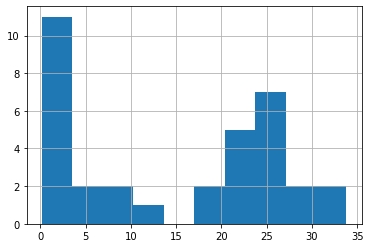

In [24]:
gol_df.value.hist()

In [21]:
gol_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Emiliano,Martínez,Aston Villa,1,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
239,Illan,Meslier,Leeds,1,5.2,50,3150,0,30.8,154,Goalkeeper,30.8
155,Vicente,Guaita,Crystal Palace,1,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
385,Hugo,Lloris,Spurs,1,4.3,55,3420,0,27.1,149,Goalkeeper,27.1
279,Ederson,Santana de Moraes,Man City,1,9.9,60,3240,0,26.7,160,Goalkeeper,26.7
448,Lukasz,Fabianski,West Ham,1,2.6,50,3150,0,26.6,133,Goalkeeper,26.6
468,Rui Pedro,dos Santos Patrício,Wolves,1,0.3,50,3330,0,26.4,132,Goalkeeper,26.4
0,Bernd,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper,26.2
120,Nick,Pope,Burnley,1,5.5,55,2880,0,26.2,144,Goalkeeper,26.2
198,Kasper,Schmeichel,Leicester,1,13.7,50,3420,0,25.6,128,Goalkeeper,25.6


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
451,Aaron,Cresswell,West Ham,2,19.2,55,3170,0,27.8,153,Defender,27.8
41,Matt,Targett,Aston Villa,2,9.6,50,3404,0,27.6,138,Defender,27.6
310,Aaron,Wan-Bissaka,Man Utd,2,11.3,55,3060,0,26.2,144,Defender,26.2
87,Lewis,Dunk,Brighton,2,6.7,50,2932,0,26.0,130,Defender,26.0
458,Vladimir,Coufal,West Ham,2,15.4,50,3054,0,25.6,128,Defender,25.6
40,Tyrone,Mings,Aston Villa,2,7.7,50,3194,0,25.6,128,Defender,25.6
182,Michael,Keane,Everton,2,3.0,50,2989,0,25.4,127,Defender,25.4
47,Ezri,Konsa Ngoyo,Aston Villa,2,1.2,50,3195,0,23.8,119,Defender,23.8
284,Rúben Santos,Gato Alves Dias,Man City,2,27.0,60,2843,0,23.7,142,Defender,23.7
470,Conor,Coady,Wolves,2,8.5,45,3303,0,23.6,106,Defender,23.6


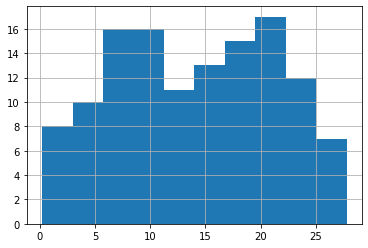

In [25]:
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
299,Bruno Miguel,Borges Fernandes,Man Utd,3,40.9,120,3101,0,20.3,244,Midfielder,20.3
255,Mohamed,Salah,Liverpool,3,48.8,125,3077,0,18.5,231,Midfielder,18.5
391,Heung-Min,Son,Spurs,3,17.1,100,3119,0,22.8,228,Midfielder,22.8
252,Sadio,Mané,Liverpool,3,3.5,120,2808,0,14.7,176,Midfielder,14.7
303,Marcus,Rashford,Man Utd,3,1.0,95,2917,0,18.3,174,Midfielder,18.3
228,Stuart,Dallas,Leeds,3,17.1,55,3410,0,31.1,171,Midfielder,31.1
240,Jack,Harrison,Leeds,3,5.5,60,2846,0,26.7,160,Midfielder,26.7
272,Ilkay,Gündogan,Man City,3,5.9,75,2025,0,20.9,157,Midfielder,20.9
371,James,Ward-Prowse,Southampton,3,8.1,65,3420,0,24.0,156,Midfielder,24.0
277,Raheem,Sterling,Man City,3,3.1,110,2534,0,14.0,154,Midfielder,14.0


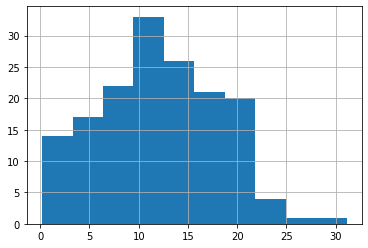

In [38]:
mid_df.value.hist()
mid_df.sort_values('total_points',ascending=False).head(50)


In [35]:
mid_df2 = mid_df.loc[(mid_df.total_points > 150) & (mid_df.value > 20.0)]
mid_df.2sort_values('vtotal_points,ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
299,Bruno Miguel,Borges Fernandes,Man Utd,3,40.9,120,3101,0,20.3,244,Midfielder,20.3
391,Heung-Min,Son,Spurs,3,17.1,100,3119,0,22.8,228,Midfielder,22.8
228,Stuart,Dallas,Leeds,3,17.1,55,3410,0,31.1,171,Midfielder,31.1
240,Jack,Harrison,Leeds,3,5.5,60,2846,0,26.7,160,Midfielder,26.7
272,Ilkay,Gündogan,Man City,3,5.9,75,2025,0,20.9,157,Midfielder,20.9
371,James,Ward-Prowse,Southampton,3,8.1,65,3420,0,24.0,156,Midfielder,24.0


In [51]:
fwd_df2 = fwd_df.loc[(fwd_df.total_points > (fwd_df['total_points'].mean()))]
fwd_df2.sort_values('value',ascending=False).head(50)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
229,Patrick,Bamford,Leeds,4,18.1,80,3052,0,24.2,194,Forward,24.2
42,Ollie,Watkins,Aston Villa,4,31.6,75,3328,0,22.4,168,Forward,22.4
190,Dominic,Calvert-Lewin,Everton,4,27.3,80,2871,0,20.6,165,Forward,20.6
117,Chris,Wood,Burnley,4,2.8,70,2741,0,19.7,138,Forward,19.7
375,Che,Adams,Southampton,4,1.7,70,2662,0,19.6,137,Forward,19.6
389,Harry,Kane,Spurs,4,26.1,125,3083,0,19.4,242,Forward,19.4
320,Callum,Wilson,Newcastle,4,5.2,75,2081,0,17.9,134,Forward,17.9
203,Jamie,Vardy,Leicester,4,9.6,105,2838,0,17.8,187,Forward,17.8
55,Danny,Ings,Aston Villa,4,8.4,80,2172,0,16.4,131,Forward,16.4
193,Richarlison,de Andrade,Everton,4,6.6,75,2862,0,16.4,123,Forward,16.4


In [46]:
fwd_df['total_points'].mean()

88.79545454545455

In [63]:
slim_elements_df['total_points'].mean()

74.7817679558011

In [68]:
allp_df = slim_elements_df.loc[(slim_elements_df.total_points > (slim_elements_df['total_points'].mean()) + 20)]
allp_df.sort_values('total_points',ascending=False).tail(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
13,Rob,Holding,Arsenal,2,3.3,45,2557,0,23.3,105,Defender,23.3
27,Ben,White,Arsenal,2,21.9,45,3192,0,23.1,104,Defender,23.1
477,Rúben Diogo,da Silva Neves,Wolves,3,1.4,55,2670,0,18.9,104,Midfielder,18.9
118,Matthew,Lowton,Burnley,2,3.2,45,3060,0,22.9,103,Defender,22.9
306,Victor,Lindelöf,Man Utd,2,0.6,50,2585,0,20.4,102,Defender,20.4
114,Ben,Mee,Burnley,2,0.9,50,2693,0,20.4,102,Defender,20.4
216,James,Justin,Leicester,2,0.1,50,2070,0,20.2,101,Defender,20.2
96,Robert,Sánchez,Brighton,1,23.4,45,2430,0,22.4,101,Goalkeeper,22.4
179,James,Rodríguez,Everton,3,4.0,70,1763,0,14.4,101,Midfielder,14.4
449,Angelo,Ogbonna,West Ham,2,0.5,50,2492,0,20.0,100,Defender,20.0
